In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sys
import math
sys.path.append('/home/eduardo/PycharmProjects/treemap-analysis/code')

import Parser
import SpatialMetrics
import TemporalMetrics

In [2]:
# Parameters
dataset_id = "Leaflet"


In [3]:
def styleBoxplot(bp, ax, n_revisions):
    
    def get_ax_size(ax):
        bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        width, height = bbox.width, bbox.height
        width *= fig.dpi
        height *= fig.dpi
        return width, height
    
    for box in bp['boxes']:
        # change outline color
        box.set(color='#1b9e77', linewidth=0)
        # change fill color
        box.set(facecolor='#1b9e77')
        box.set_zorder(10)
    for i, median in enumerate(bp['medians']):
        median.set(color='#1445FF', linewidth=2, ms=(get_ax_size(ax)[0])/(n_revisions))
        median.set_zorder(11)
        median.set_xdata([i + 1 - 0.3, i + 1 + 0.3])
    for whisker in bp['whiskers']:
        whisker.set(color='#CCCCCC', linestyle='-', linewidth=(get_ax_size(ax)[0])/(n_revisions))
    for cap in bp['caps']:
        cap.set(color='#FFFFFF', linewidth=0)
        
    # Set only 3 ticks on x
    ax.set_xticks([1, n_revisions / 2, n_revisions], minor=False)
    ax.set_xticklabels([1, int(n_revisions / 2), n_revisions], fontdict=None, minor=False)
    
    # Remove extra spines and ticks
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', which='both', top='off')
    ax.tick_params(axis='y', which='both', right='off', left='off')

In [4]:
def cm2inch(value):
    return value/2.54

# Aggregated spatial metric boxplots
Aggregate Q_ar and Q_weighted_ar

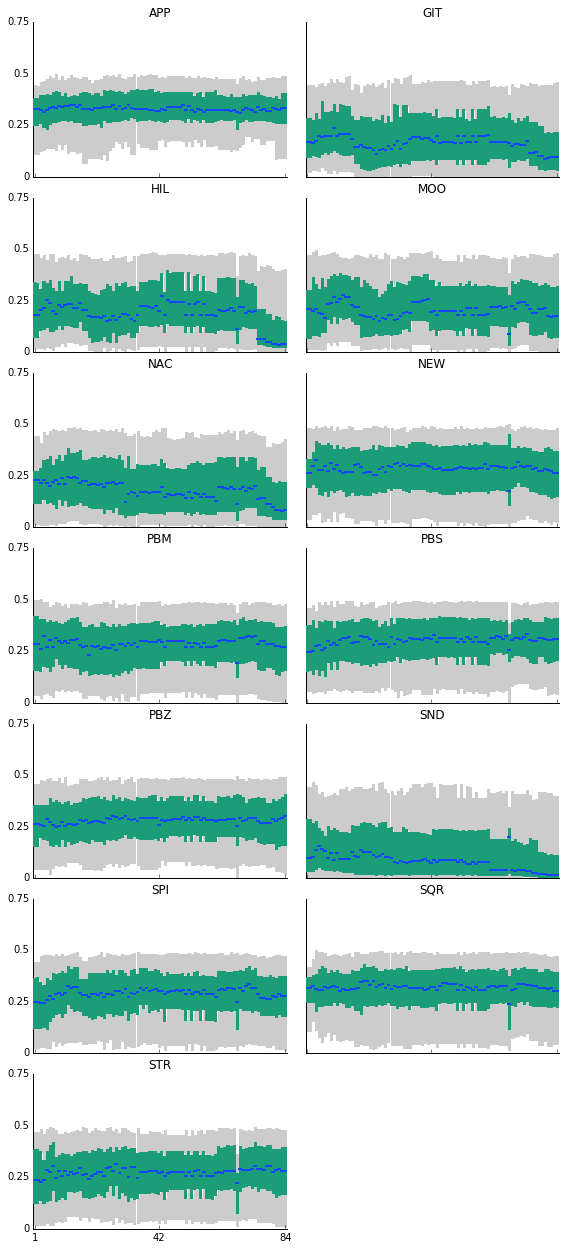

In [5]:
technique_list = Parser.list_techniques()
nrow = 7
ncol = 2
fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(cm2inch(20), cm2inch(2*22)))
fig.delaxes(axs[6, 1])
fig.tight_layout()

for i, ax in enumerate(fig.axes):
    ax.set_title(technique_list[i].upper())
    
    data = []
    history = Parser.parse_rectangles(technique_list[i], dataset_id)
    for i, df in enumerate(history):
        df_ar = SpatialMetrics.q_ar(df)
        df_ar = pd.merge(df_ar, SpatialMetrics.q_weighted_ar(df))
        column = 't' + str(i)
        data.append(df_ar.mean(axis=1))
    
    bp = ax.boxplot(data, whis=[5, 95], showfliers=False, patch_artist=True, widths=1);
    styleBoxplot(bp, ax, len(data))

    ax.set_ylim([0, .75])
    ax.set_yticks([0, .25, .5, .75], minor=False)
    ax.set_yticklabels([0, .25, .5, .75], fontdict=None, minor=False)
 
fig.savefig('time/svg/' + dataset_id + '_spatial.svg', format='svg', dpi=1200)

# Aggregated stability metrics boxplots
Weighted and unweighted ratio metrics using the corner travel dist as delta_vis

In [6]:
# technique_list = Parser.list_techniques()
# nrow = 7
# ncol = 2
# fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(cm2inch(20), cm2inch(2*22)))
# fig.delaxes(axs[6, 1])
# fig.tight_layout()
# for i, ax in enumerate(fig.axes):
#     ax.set_title(technique_list[i].upper())

#     data = []
#     history = Parser.parse_rectangles(technique_list[i], dataset_id)
#     for i in range(1, len(history)):
#         df = TemporalMetrics.delta_vis(history[i - 1], history[i])
#         df = pd.merge(df, TemporalMetrics.delta_data_by_area(history[i - 1], history[i]))
#         df = pd.merge(df, TemporalMetrics.relative_weight(history[i - 1], history[i]))

#         df_stab = TemporalMetrics.q_ratio(df)
#         df_stab = pd.merge(df_stab, TemporalMetrics.q_weighted_ratio(df))
        
#         column = 't' + str(i)
#         data.append(df_stab.mean(axis=1))

#     bp = ax.boxplot(data, whis=[5, 95], showfliers=False, patch_artist=True, widths=1);
    
#     ax.set_ylim(ymin=-0.05)
#     ax.set_yticks([0, .25, .5, .75], minor=False)
#     ax.set_yticklabels([0, .25, .5, .75], fontdict=None, minor=False)
#     styleBoxplot(bp, ax, len(data))

# fig.savefig('time/svg/' + dataset_id + '_stab.svg', format='svg', dpi=1200)